# FASE 1 | AULA 5 - DESAFIO ANALISE EXPLORATORIA DE DADOS

### Proposta
A distribuidora de vinhos FIAPWine decidiu explandir seus horizontes e agora esta importando vinhos tintos e brancos portugueses, mais espeficicamente a marca "Vinho Verde", que fará sua carta de vinhos se tornar mais vasta aqui no Brasil.

Hoje, o Head de Dados da FIAPWine necessita de uma quipe de dados alinhada com o propósito de gerar insights valiosos para análise da qualidade dos novos vinhos. Para isso, foi disponibilizada uma base de dados sobre o vinho português do ano de 2009, cuja a referencia academia se encontra no arquivo de Cortez et al., 2009.

Você foi designado para fazer as análises nos vinhos tintos, etão é necessário que você siga os seguintes passos.

# Importar Bibliotecas

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importe o dataset "winequality-red-csv".

In [25]:
url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Ler o conjunto de dados usando o pandas

In [26]:
df = pd.read_csv(url, sep=';')

# Exibir as primeiras linhas do conjunto de dados para verificar se foi carregado corretamente

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Alterar nomes das colunas para português



In [28]:
df.columns = ['Acidez Fixa', 'Acidez Volátil', 'Ácido Cítrico', 'Açúcar Residual', 'Cloretos', 'Dióxido de Enxofre Livre',
              'Dióxido de Enxofre Total', 'Densidade', 'pH', 'Sulfatos', 'Álcool', 'Qualidade do Vinho']

# Utilize o Pandas para verificar a estrutura do dataset (número de linhas, colunas, tipo de dados das colunas, etc.)

In [29]:
df.shape

(1599, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Acidez Fixa               1599 non-null   float64
 1   Acidez Volátil            1599 non-null   float64
 2   Ácido Cítrico             1599 non-null   float64
 3   Açúcar Residual           1599 non-null   float64
 4   Cloretos                  1599 non-null   float64
 5   Dióxido de Enxofre Livre  1599 non-null   float64
 6   Dióxido de Enxofre Total  1599 non-null   float64
 7   Densidade                 1599 non-null   float64
 8   pH                        1599 non-null   float64
 9   Sulfatos                  1599 non-null   float64
 10  Álcool                    1599 non-null   float64
 11  Qualidade do Vinho        1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
df.describe()

,Acidez Fixa,Acidez Volátil,Ácido Cítrico,Açúcar Residual,Cloretos,Dióxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Álcool,Qualidade do Vinho
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Verificar valores nulos no conjunto de dados


In [32]:
valores_nulos = df.isnull().sum()

# Exibir os valores nulos por coluna
print("Valores Nulos por Coluna:")
print(valores_nulos)

Valores Nulos por Coluna:
Acidez Fixa                 0
Acidez Volátil              0
Ácido Cítrico               0
Açúcar Residual             0
Cloretos                    0
Dióxido de Enxofre Livre    0
Dióxido de Enxofre Total    0
Densidade                   0
pH                          0
Sulfatos                    0
Álcool                      0
Qualidade do Vinho          0
dtype: int64


# Identificar linhas duplicadas


In [33]:
linhas_duplicadas = df[df.duplicated()]

# Exibir as linhas duplicadas
print("Linhas Duplicadas:")
linhas_duplicadas.shape

Linhas Duplicadas:


(240, 12)

# Remover linhas duplicadas


In [34]:
df_sem_duplicatas = df.drop_duplicates()

# Exibir as primeiras linhas do DataFrame sem duplicatas
print("\nDataFrame sem Duplicatas:")
df_sem_duplicatas[df_sem_duplicatas.duplicated()].shape



DataFrame sem Duplicatas:


(0, 12)

# a. Distribuição da acidez volátil por qualidade do vinho (usando histograma)


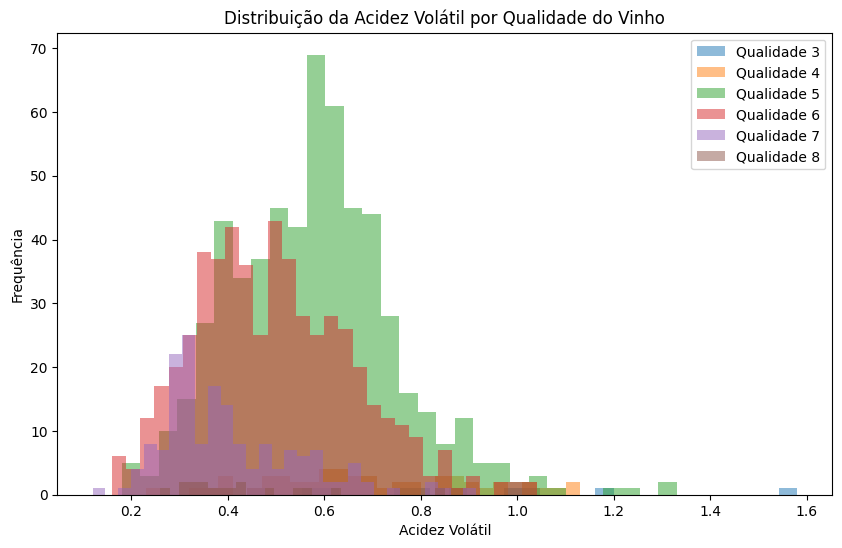

In [35]:
plt.figure(figsize=(10, 6))
for qualidade in sorted(df_sem_duplicatas['Qualidade do Vinho'].unique()):
    subset = df_sem_duplicatas[df_sem_duplicatas['Qualidade do Vinho'] == qualidade]
    plt.hist(subset['Acidez Volátil'], bins=30, alpha=0.5, label=f'Qualidade {qualidade}')

plt.title('Distribuição da Acidez Volátil por Qualidade do Vinho')
plt.xlabel('Acidez Volátil')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# b. Distribuição do teor alcoólico por qualidade do vinho (usando histograma)


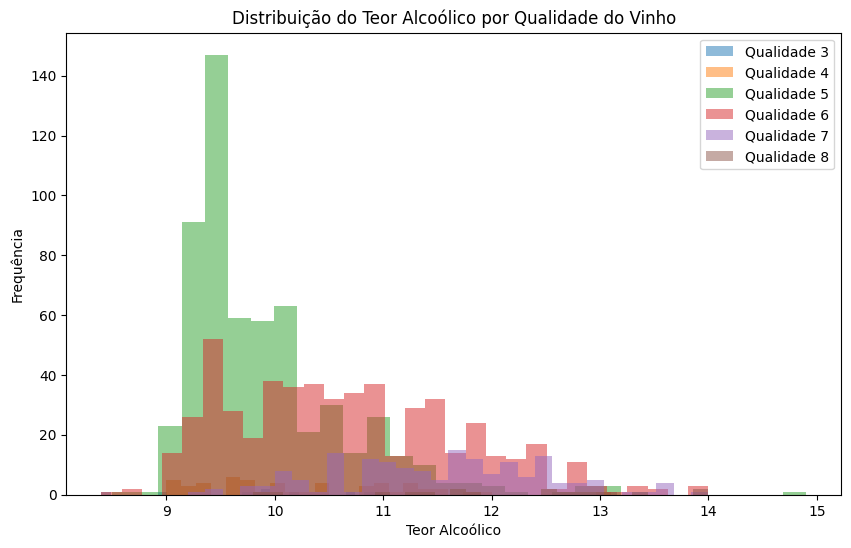

In [36]:
plt.figure(figsize=(10, 6))
for qualidade in sorted(df_sem_duplicatas['Qualidade do Vinho'].unique()):
    subset = df_sem_duplicatas[df_sem_duplicatas['Qualidade do Vinho'] == qualidade]
    plt.hist(subset['Álcool'], bins=30, alpha=0.5, label=f'Qualidade {qualidade}')

plt.title('Distribuição do Teor Alcoólico por Qualidade do Vinho')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# c. Relação entre acidez volátil e teor alcoólico (usando gráfico de dispersão)


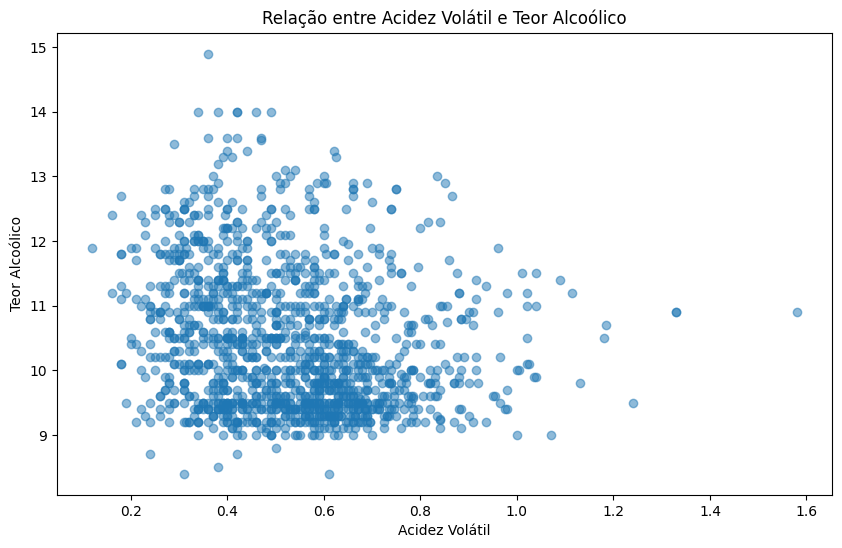

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sem_duplicatas['Acidez Volátil'], df_sem_duplicatas['Álcool'], alpha=0.5)
plt.title('Relação entre Acidez Volátil e Teor Alcoólico')
plt.xlabel('Acidez Volátil')
plt.ylabel('Teor Alcoólico')
plt.show()

# d. Relação entre teor alcoólico e qualidade do vinho (usando gráfico de dispersão)


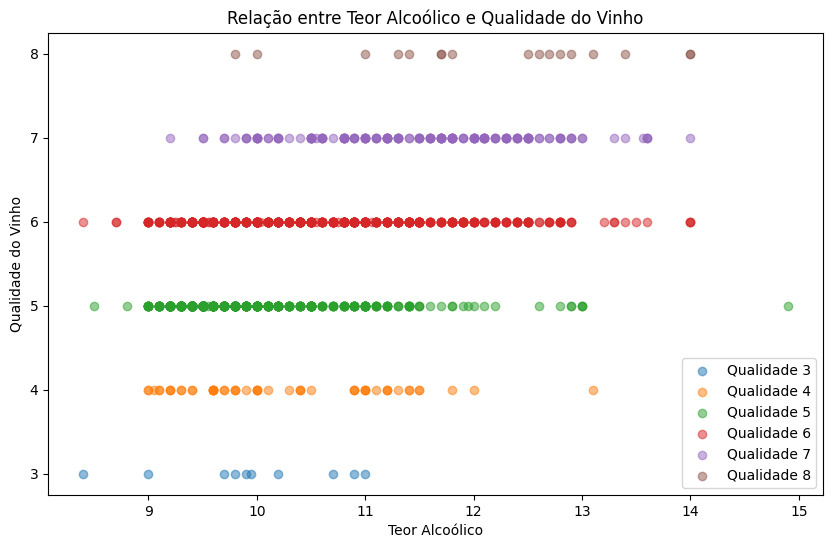

In [38]:
plt.figure(figsize=(10, 6))
for qualidade in sorted(df_sem_duplicatas['Qualidade do Vinho'].unique()):
    subset = df_sem_duplicatas[df_sem_duplicatas['Qualidade do Vinho'] == qualidade]
    plt.scatter(subset['Álcool'], subset['Qualidade do Vinho'], alpha=0.5, label=f'Qualidade {qualidade}')

plt.title('Relação entre Teor Alcoólico e Qualidade do Vinho')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Qualidade do Vinho')
plt.legend()
plt.show()

# a. Qual a acidez volátil média dos vinhos de qualidade elevada?

In [41]:
# Filtrar vinhos de qualidade elevada
qualidade_elevada = df_sem_duplicatas[df_sem_duplicatas['Qualidade do Vinho'].isin([7, 8])]

# Calcular a acidez volátil média
media_acidez_volatil_qualidade_elevada = qualidade_elevada['Acidez Volátil'].mean()

print(f'A acidez volátil média dos vinhos de qualidade elevada é: {media_acidez_volatil_qualidade_elevada:.2f}')

A acidez volátil média dos vinhos de qualidade elevada é: 0.41


# b. Qual a relação entre teor alcoólico e qualidade do vinho?

### Podemos usar um gráfico de caixa (boxplot) para visualizar essa relação.

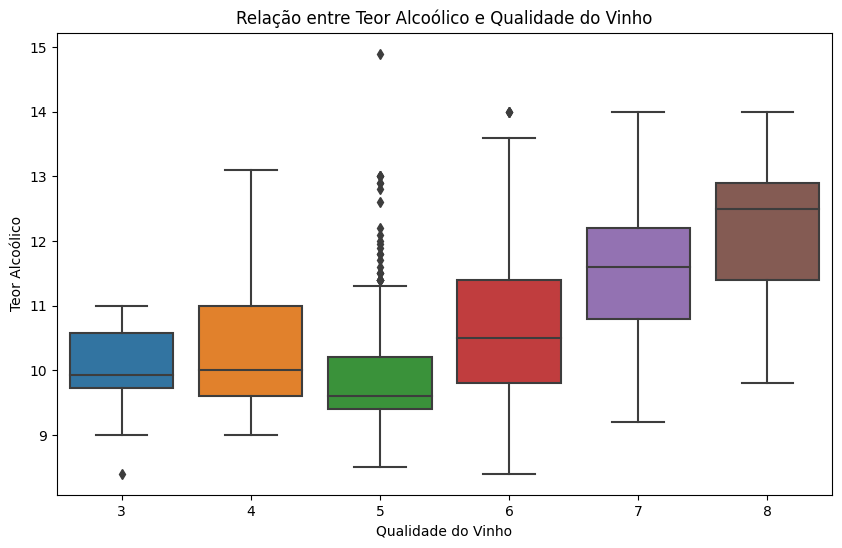

In [42]:
# Gráfico de caixa do teor alcoólico por qualidade do vinho
plt.figure(figsize=(10, 6))
sns.boxplot(x='Qualidade do Vinho', y='Álcool', data=df_sem_duplicatas)
plt.title('Relação entre Teor Alcoólico e Qualidade do Vinho')
plt.xlabel('Qualidade do Vinho')
plt.ylabel('Teor Alcoólico')
plt.show()

# c. Há alguma relação entre acidez volátil e teor alcoólico?

### Vamos verificar isso usando o gráfico de dispersão.

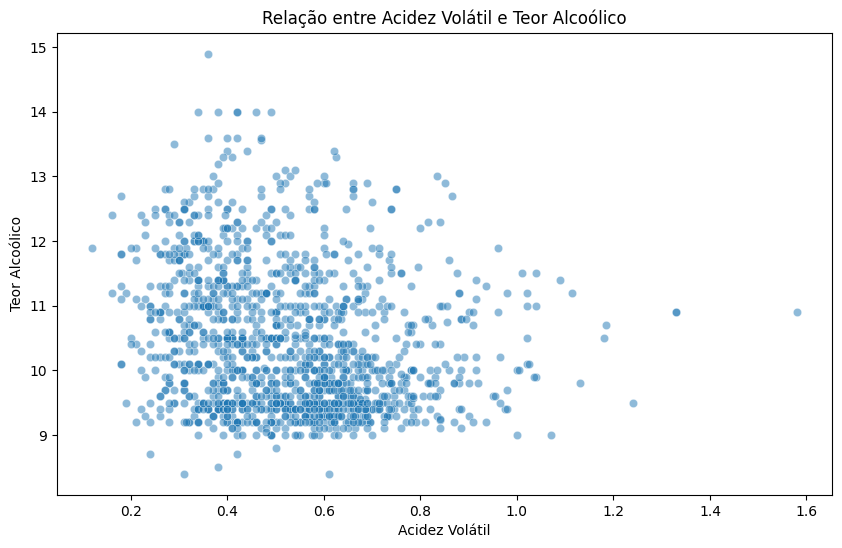

In [43]:
# Gráfico de dispersão entre acidez volátil e teor alcoólico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acidez Volátil', y='Álcool', data=df_sem_duplicatas, alpha=0.5)
plt.title('Relação entre Acidez Volátil e Teor Alcoólico')
plt.xlabel('Acidez Volátil')
plt.ylabel('Teor Alcoólico')
plt.show()


# d. Há alguma relação entre acidez volátil e qualidade do vinho?

### Uma possível análise é comparar as distribuições de acidez volátil para diferentes categorias de qualidade do vinho.

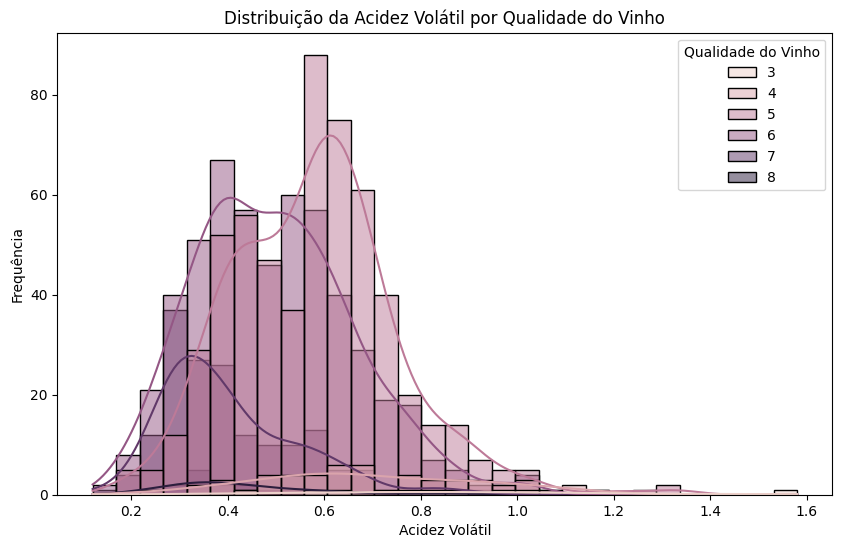

In [44]:
# Histograma da acidez volátil por qualidade do vinho
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sem_duplicatas, x='Acidez Volátil', hue='Qualidade do Vinho', bins=30, kde=True, alpha=0.5)
plt.title('Distribuição da Acidez Volátil por Qualidade do Vinho')
plt.xlabel('Acidez Volátil')
plt.ylabel('Frequência')
plt.show()
